# Informe Final Carrera

# Resumen del proyecto
Profundiza y ajusta la resolución de tus proyectos. Agrega una fuente de datos, prueba un modelo nuevo o responde una pregunta nueva. Elabora un informe final que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.

La realización y entrega del Proyecto es individual.

# Entregables
Un Notebook de Jupyter con la resolución de la consigna. El Notebook debe poder ejecutarse sin errores. En el notebook debe estar el link al repositorio (por ejemplo, de GitHub) donde se pueda encontrar el proyecto entregado y todo los materiales necesarios.

# Referencias
Apóyate en las bitácoras, los notebooks trabajados y las presentaciones vistas en clase para resolver tu proyecto. También será de mucha utilidad la documentación de las librerías de Python. No dudes en consultar comunidades online como Stack Overflow y, por supuesto, buscar en la web (googlear).

# Consigna
Te presentamos los pasos a seguir para realizar el proyecto 04.

* Elige tu punto de partida entre dos opciones:
  * Tus Proyectos 01 y 02
  * Tu Proyecto 03

Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

* **Formula una nueva pregunta, problema o desafío para explorar.** Aquí hay una lista no exhaustiva de opciones que puedes elegir:

* **Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera.** En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.

* **Agrega al proyecto información de otra fuente.**¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.

* **Continúa el Análisis Exploratorio de Datos.** Recuerda que es tan importante como entrenar un modelo de Machine Learning.

* **Sigue las sugerencias que te propusimos en los notebooks** para continuar el Proyecto 03.

Plantea un objetivo alcanzable. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.

## Checklist de evaluación

* Se evaluará la claridad con la que está expuesto el objetivo a alcanzar y su relevancia.

* Los pasos deben estar correctamente justificados. No deben haber grandes grupos de celdas de código sin explicar su función. Lo mismo aplica para los gráficos. Recuerda que el notebook es un informe.

* Las preguntas que se respondan deben estar correctamente explicitadas.

* Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.

* Debes entregar el proyecto anterior correspondiente (Proyecto 2 si eliges continuar con el dataset de Properati, Proyecto 3 si eliges continuar con alguna aplicación), el cual debe estar subido al repositorio.

* Incorpora las correcciones y/o sugerencias que tu evaluador/a te haya dado en la devolución del proyecto correspondiente anterior.


Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores.

### **Importante**

A continuación indico cuales son las tareas que he realizado en el proyecto.

Tareas realizadas:
* Creación modelo Benchmark
* Búsqueda mejor modelo con librería **lazypredict**
* Creación modelo ExtraTreesClassifier
* Creación modelo Sklearn Neural network
* Creación modelo Tensorflow Keras
* Conclusiones

**Anexo I**

En este anexo explico como bajarse el repositorio de Github para correr la Web APP creada con el programa Streamlit.

## Proyecto 4

En este proyecto voy a retomar el proyecto 3 que había encarado el problema de NLP. Para comenzar voy a utilizar como Benchmark el mejor modelo que conseguí en el proyecto 3. El mejor modelo que había conseguido es el modelo de Random Forest. En cuanto al vectorizador voy a utilzar CountVectorizer ya que al realizar varias pruebas ha sido más rápido que los otros vectorizadores. Por último voy a utilizar el modelo lematizado ya que al probar las predicciones a sido más efectivo. 

Cabe aclarar que he sacado el conjunto de stopwords que tenía en el proyecto anterior porque hacía que las métricas de cada uno de los modelos sean menor. Solo me voy a quedar con las stopwords que trae el corpus de NLTK.

El objetivo principal de este proyecto es **mejorar las métricas** obtenidas en el proyecto anterior. Para ellos voy a tomar tres nuevos modelos y compararlos con el mejor modelo conseguido en el proyecto anterior.

La métrica que voy a utilizar como lo hice en el proyecto anterir es accuracy. La seleccioné porque mide el porcentaje de casos que el modelo ha acertado. El dataset es está balanceado así que no hay problema en utilizarla.

Para identificar nuevos modelos que superen la métrica de accuracy en primer lugar voy a utilizar una la librería lazypredict que corre 28 modelos.

Luego voy a crear una red neuronal con Keras de Tensorflow para ver si el uso de una red neuronal hace mejorar las métricas.

In [78]:
# Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import itertools
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/dlcastan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dlcastan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
#Importo las librerías que voy a necesitar
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [80]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dlcastan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dlcastan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
#Cargo datos desde archivo
data = pd.read_json("dataset_es_dev.json", lines = True)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


## Stopwords

In [82]:
# Cargo las Stopwords para el idioma español
from nltk.corpus import stopwords
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [84]:
# Sumo palabras al stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
print(stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

## Creo Dataset

## Lemmatization

In [85]:
# Importamos esta libreria que nos permite reemplazar caracteres
wordnet_lemmatizer = WordNetLemmatizer()

In [86]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [87]:
reviews_list=[]
for reviews in dataset.review_body:
    reviews = re.sub("[^a-zA-Z]"," ", str(reviews)) 
    reviews = reviews.lower()
    reviews = word_tokenize(reviews)
    review_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in reviews]
    reviews = [palabra for palabra in reviews if len(palabra)>3 ]
    reviews = [palabra for palabra in reviews if not palabra in stopwords]
    reviews = " ".join(reviews)
    reviews_list.append(reviews)

In [88]:
dataset["review_lemm"] = reviews_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem,review_lemm,opinion
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impec tien tama util p...,encantado cesta llegado impecable tama util pe...,1
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desemp funci correctament,desempe funci correctamente,1
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flore vienen imagen aplastad...,encantado diadema flores vienen imagen aplasta...,1
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan funda funda normalment fina colorida ha...,gustan fundas fundas normalmente finas colorid...,1
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,culo cumplido expectativa deseaba,culo cumplido expectativas deseaba,1


## Creo columna Opiniones

In [89]:
# Creo columna de opinion positiva(1) y negativa(0)
dataset['opinion'] = ''
# Cambio stars por 0 y 1
i = 0
while i < len(dataset):
    if dataset.stars[i] < 3:
       dataset.opinion[i] = 0
    else:
       dataset.opinion[i] = 1
    i = i +1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
dataset

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem,review_lemm,opinion
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,malisimo grand aparatoso protector pantalla,malisimo grande aparatoso protector pantalla,0
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,recibido pedido devoluci,recibido pedido devoluci,0
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,buscar sistema funciona abrazadera lleva agarr...,buscar sistema funciona abrazadera lleva agarr...,0
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,util broca menor metro doblaron varia mantequi...,utilic brocas menor metro doblaron mantequilla...,0
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,gusta olor viejo aspecto malo,gusta olor viejo aspecto malo,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impec tien tama util p...,encantado cesta llegado impecable tama util pe...,1
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desemp funci correctament,desempe funci correctamente,1
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flore vienen imagen aplastad...,encantado diadema flores vienen imagen aplasta...,1
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan funda funda normalment fina colorida bo...,gustan fundas fundas normalmente finas colorid...,1


## Vectorización con CountVectorizer

In [90]:
list_reviews_lemm = list(dataset['review_lemm'].values)
stars = dataset['stars'].values
opinion = dataset['opinion'].values

In [91]:
# Importo librerías para vectorizar
from sklearn.feature_extraction.text import CountVectorizer

# Voy a usar las 2000 palabras con mas frecuencia
max_features=2000
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [92]:
matriz_count_lemm = cou_vec.fit_transform(list_reviews_lemm)
all_words = cou_vec.get_feature_names()

# Veo las 50 palabras mas utilizadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abre', 'abrir', 'abrirla', 'abrirlo', 'absolutamente', 'absoluto', 'acaba', 'acabado', 'acabados', 'acabar', 'acabe', 'acabo', 'accesorio', 'accesorios', 'aceite', 'aceptable', 'acertado', 'acolchado', 'acompa', 'aconsejo', 'acopla', 'acoplar', 'acorde', 'actividades', 'adapta', 'adaptador', 'adaptadores', 'adaptan', 'adecuada', 'adecuado', 'adelante', 'adem', 'ademas', 'adhesivo', 'adhiere', 'adir', 'adquirir', 'adulto', 'agarre', 'agradable', 'agradecer', 'agua', 'aguanta', 'aguantan', 'aguantar', 'agujero', 'agujeros']


In [93]:
# Creo dataframe con la información de cada modelo 
from pandas import DataFrame
columnas = ["Modelo", "Tipo", "Libreria", "Parametros", "Vectorizador", "Texto", "Accuracy"]
grid = DataFrame(columns = columnas)
convert_column = {'Modelo': str, 
                  'Tipo': str,
                  'Libreria': str, 
                  'Parametros': str,
                  'Vectorizador': str,
                  'Texto': str,
                  "Accuracy": float
               } 
  
grid = grid.astype(convert_column) 
print(grid.dtypes)

Modelo           object
Tipo             object
Libreria         object
Parametros       object
Vectorizador     object
Texto            object
Accuracy        float64
dtype: object


## Mejor Modelo Obtenido Proyecto 3

In [94]:
# Corro el modelo con los mejores parámetros
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')

rf_best = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
rf_best.fit(X_train,y_train)
pred_train = rf_best.predict(X_train)
pred_test = rf_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)

grid = grid.append({
'Modelo' : "RandomForestClassifier",
'Tipo': "Benchmark",
'Libreria': "nltk",
'Parametros': "'n_jobs': 1, 'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 7, 'max_depth': 8, 'criterion': 'gini'",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)


## Busco el mejor Modelo

In [ ]:
# Instalo las librerías de lazypredict para ver cual es el mejor modelo
! pip install lazypredict

In [ ]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Load dataset
X = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')


# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 29/29 [00:00<00:00, 85059.31it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.99,0.99,0.99,0.99,4.23
DecisionTreeClassifier,0.99,0.99,0.99,0.99,4.28
ExtraTreeClassifier,0.99,0.99,0.99,0.99,0.61
ExtraTreesClassifier,0.99,0.99,0.99,0.99,17.79
LabelSpreading,0.99,0.99,0.99,0.99,4.61
RandomForestClassifier,0.99,0.99,0.99,0.99,12.91
LogisticRegression,0.98,0.98,0.98,0.98,1.18
LinearSVC,0.98,0.98,0.98,0.98,12.03
BaggingClassifier,0.97,0.97,0.97,0.97,19.88


In [ ]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

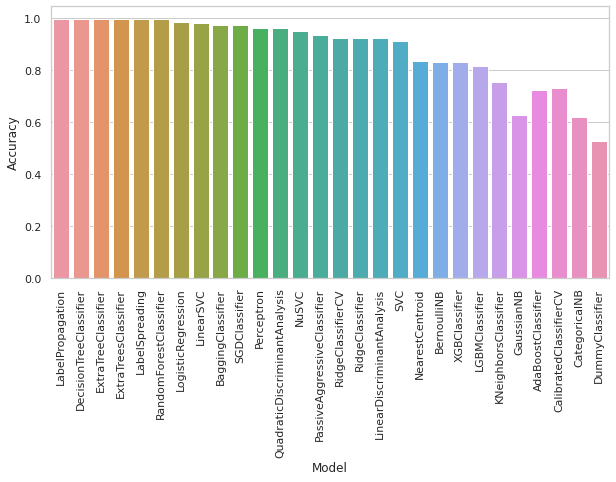

In [ ]:
# Grafico 28 modelos con la métrica de accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="Accuracy", data=models_train)
plt.xticks(rotation=90)

## Conclusiones


Voy a utlizar el modelo ExtraTreeClassifier porque es el que posee más accuracy y que corre en el menor tiempo.

## ExtraTreeClassifier

In [95]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [96]:
x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')

# Armo modelo ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [97]:
# Grabo el modelo
pickle.dump(etc, open("tree.pkl", "wb"))

In [98]:
acc = accuracy_score(y_test, pred_test)

In [99]:
print(acc)

0.7313333333333333


In [100]:
grid = grid.append({
'Modelo' : "ExtraTreesClassifier",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)

## Tensorflow

In [107]:
#Genero la red Neuronal
import tensorflow as tf
import tensorflow.keras as kr
from IPython.core.display import display, HTML

x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')

lr = 0.01        
nn = [5000, 4, 1]  

model = kr.Sequential()


l1 = model.add(kr.layers.Dense(nn[0], activation='relu'))
l2 = model.add(kr.layers.Dense(nn[1], activation='relu'))
l3 = model.add(kr.layers.Dense(nn[2], activation='sigmoid'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [108]:
# Entrenamos al modelo
model.fit(x, y, epochs=10, batch_size=20)

Train on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 63s 13ms/sample - loss: 0.6346 - accuracy: 0.6252
Epoch 2/10
5000/5000 [==============================] - 67s 13ms/sample - loss: 0.5935 - accuracy: 0.8166
Epoch 3/10
5000/5000 [==============================] - 65s 13ms/sample - loss: 0.5751 - accuracy: 0.8588
Epoch 4/10
5000/5000 [==============================] - 66s 13ms/sample - loss: 0.5597 - accuracy: 0.8888
Epoch 5/10
5000/5000 [==============================] - 67s 13ms/sample - loss: 0.5459 - accuracy: 0.9098
Epoch 6/10
5000/5000 [==============================] - 68s 14ms/sample - loss: 0.5369 - accuracy: 0.9210
Epoch 7/10
5000/5000 [==============================] - 69s 14ms/sample - loss: 0.5239 - accuracy: 0.9224
Epoch 8/10
5000/5000 [==============================] - 71s 14ms/sample - loss: 0.5046 - accuracy: 0.9246
Epoch 9/10
5000/5000 [==============================] - 72s 14ms/sample - loss: 0.5018 - accuracy: 0.9294
Epoch 10/10
5000/5000 [=

In [113]:
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state([[1], [2], [3], [4]], [[0], [2], [3], [4]])
acc = accuracy.result().numpy()

In [114]:
#Grabo el modelo
model.save('model.h5')

In [115]:
grid = grid.append({
'Modelo' : "Tensorflow_Keras",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)

In [116]:
# Resultados de los modelos
grid.sort_values('Accuracy', ascending= False, inplace= True)
grid

,Modelo,Tipo,Libreria,Parametros,Vectorizador,Texto,Accuracy
0,Tensorflow_Keras,Best Params,nltk,,CountVectorizer,Lematizado,0.75
3,Tensorflow_Keras,Best Params,nltk,,CountVectorizer,Lematizado,0.75
1,RandomForestClassifier,Benchmark,nltk,"'n_jobs': 1, 'n_estimators': 50, 'min_samples_...",CountVectorizer,Lematizado,0.73
2,ExtraTreesClassifier,Best Params,nltk,"criterion='gini', max_depth=None, max_features...",CountVectorizer,Lematizado,0.73


## Conclusiones

Siguiendo con el objetivo de este proyecto pude mejorar la métrica de accuracy. **El mejor modelo fue Tensor Flow** superando a los modelos de Random Forest, Extra trees Clasifier y hasta el Sklearn Neural Network.

# Anexo I

## DataScience Interactive Multi Web App con Streamlit

Para implementar los modelos que están en este notebook cree una Web App para controlar los resultados.

En la app creada con Streamlit se puede realizar tres operaciones análisis de textos, análisis de sentimientos y prueba de los modelos.

Para utilizarla solo hay que introducir un texto y seleccionar la operación.

Los modelos que utilizo en la App son Random Forest, Extra Trees Classifier y Red Neuronal Keras.



## URL Repositorio
```console
https://github.com/dlcastan/DataScience
```


## Instalación
Dependencias que tenes que tener:
```console
pip install streamlit
pip install scikit-learn
pip install tensorflow
pip install textblob
python -m spacy download es_core_news_sm
```

## Clonar el repositorio
Generar modelos 
```console
git clone https://github.com/dlcastan/DataScience.git
```

## Generación de los modelos
Generar modelos 
```console
python dev.py
```

## Correr App
Correr
```console
streamlit run app.py
```